In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
#df = pd.read_excel("Online Retail.xlsx")
#df.to_csv('Online Retail.csv') 

In [2]:
df=pd.read_csv('Online Retail.csv',index_col=0)
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
def explain(attribute):
    features= {'InvoiceNo': "Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.",
    'StockCode': 'Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.',
    'Description': 'Product (item) name. Nominal.',
    'Quantity': 'The quantities of each product (item) per transaction. Numeric.',
    'InvoiceDate': 'Invice Date and time. Numeric, the day and time when each transaction was generated.',
    'UnitPrice': 'Unit price. Numeric, Product price per unit in sterling.',
    'CustomerID': 'Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.',
    'Country': 'Country name. Nominal, the name of the country where each customer resides.'}
    return features[attribute]

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [5]:
df.shape

(541909, 8)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df= df.dropna(subset=['CustomerID'])

In [9]:
df.shape

(406829, 8)

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(401604, 8)

In [12]:
df[df['Quantity'] < 0].shape

(8872, 8)

In [13]:
df[df['UnitPrice'] < 0].shape

(0, 8)

In [14]:
explain('InvoiceNo')

"Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation."

In [15]:
cancel = df[df['InvoiceNo'].astype(str).str.contains('C')]

In [16]:
cancel.shape

(8872, 8)

In [17]:
cancel.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [18]:
df['cancel2'] = df['InvoiceNo'].str.contains('C')

In [19]:
df['cancel2'].value_counts()

False    392732
True       8872
Name: cancel2, dtype: int64

In [20]:
df['cancel2'].iloc[154]

True

In [21]:
df['cancel2'] = df.cancel2.replace('True',1).replace('False',0) 

In [22]:
df.cancel2.value_counts() 

False    392732
True       8872
Name: cancel2, dtype: int64

In [23]:
df['cancel2'] = df['cancel2']*1

In [24]:
df['cancel2'].value_counts()

0    392732
1      8872
Name: cancel2, dtype: int64

In [25]:
df[(df.cancel2==1) & (df.Quantity>0)] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel2


In [26]:
df[df.cancel2==1]['CustomerID'].nunique() / df['CustomerID'].nunique() 
# nunique(): return number of unique elements in the object. excludes na values by default.
# Don’t include NaN in the count.

0.3634492223238792

In [27]:
df = df[(df.Quantity > 0) & (df.UnitPrice > 0)]

In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel2
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [29]:
df.shape

(392692, 9)

In [30]:
df[df.cancel2==1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel2


In [31]:
df = df.drop(['cancel2'],axis=1)

In [32]:
df.shape

(392692, 8)

In [33]:
df.groupby('CustomerID')['InvoiceNo'].nunique()

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4338, dtype: int64

In [34]:
# What's the average number of unqiue items per order or per customer?
df.groupby(['CustomerID', 'InvoiceNo', 'StockCode'])['Quantity'].mean()

CustomerID  InvoiceNo  StockCode
12346.0     541431     23166        74215.0
12347.0     537626     20780           12.0
                       20782            6.0
                       21064            6.0
                       21171           12.0
                                     ...   
18287.0     570715     85039B          48.0
                       85173           48.0
            573167     21014           24.0
                       21824           48.0
                       23264           36.0
Name: Quantity, Length: 387841, dtype: float64

In [35]:
# Let's see how this compares to the number of unique products per customer.
df.groupby(['CustomerID', 'StockCode'])['Quantity'].sum()

CustomerID  StockCode
12346.0     23166        74215
12347.0     16008           24
            17021           36
            20665            6
            20719           40
                         ...  
18287.0     84920            4
            85039A          96
            85039B         120
            85040A          48
            85173           48
Name: Quantity, Length: 266792, dtype: int64

In [36]:
## revenue means total price.
## how can find the total price? I can multiple Quantity and UnitPrice
df['total_price'] = df['Quantity'] * df['UnitPrice']

In [37]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [38]:
round((df.groupby('Country').total_price.sum()),2)

Country
Australia                138453.81
Austria                   10198.68
Bahrain                     548.40
Belgium                   41196.34
Brazil                     1143.60
Canada                     3666.38
Channel Islands           20440.54
Cyprus                    13502.85
Czech Republic              826.74
Denmark                   18955.34
EIRE                     265262.46
European Community         1300.25
Finland                   22546.08
France                   208934.31
Germany                  228678.40
Greece                     4760.52
Iceland                    4310.00
Israel                     7215.84
Italy                     17483.24
Japan                     37416.37
Lebanon                    1693.88
Lithuania                  1661.06
Malta                      2725.59
Netherlands              285446.34
Norway                    36165.44
Poland                     7334.65
Portugal                  33375.84
RSA                        1002.31
Saudi Arabia

In [39]:
round((df.groupby('Country').total_price.sum()),2).sort_values(ascending=False)

Country
United Kingdom          7285024.64
Netherlands              285446.34
EIRE                     265262.46
Germany                  228678.40
France                   208934.31
Australia                138453.81
Spain                     61558.56
Switzerland               56443.95
Belgium                   41196.34
Sweden                    38367.83
Japan                     37416.37
Norway                    36165.44
Portugal                  33375.84
Finland                   22546.08
Singapore                 21279.29
Channel Islands           20440.54
Denmark                   18955.34
Italy                     17483.24
Cyprus                    13502.85
Austria                   10198.68
Poland                     7334.65
Israel                     7215.84
Greece                     4760.52
Iceland                    4310.00
Canada                     3666.38
USA                        3580.39
Malta                      2725.59
Unspecified                2660.77
United Arab 

In [40]:
df['CustomerID'].dtype

dtype('float64')

In [41]:
df.groupby('Country').CustomerID.count()

Country
Australia                 1181
Austria                    398
Bahrain                     17
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            747
Cyprus                     603
Czech Republic              25
Denmark                    380
EIRE                      7226
European Community          60
Finland                    685
France                    8326
Germany                   9025
Greece                     145
Iceland                    182
Israel                     245
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2359
Norway                    1071
Poland                     330
Portugal                  1453
RSA                         57
Saudi Arabia                 9
Singapore                  222
Spain                     2479
Sweden                     450


In [42]:
df.groupby('Country').CustomerID.count().sort_values(ascending=False)

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [43]:
df_new  = pd.DataFrame(round((df.groupby('Country').total_price.sum()),2).sort_values(ascending=False))

In [44]:
df_new.head()

,total_price
Country,
United Kingdom,7285024.64
Netherlands,285446.34
EIRE,265262.46
Germany,228678.40
France,208934.31


In [45]:
df_new['num_of_customer'] = df.groupby('Country').CustomerID.count().sort_values(ascending=False)

In [46]:
df_new.head()

,total_price,num_of_customer
Country,,
United Kingdom,7285024.64,349203
Netherlands,285446.34,2359
EIRE,265262.46,7226
Germany,228678.40,9025
France,208934.31,8326


In [47]:
df_new.iloc[1:].index

Index(['Netherlands', 'EIRE', 'Germany', 'France', 'Australia', 'Spain',
       'Switzerland', 'Belgium', 'Sweden', 'Japan', 'Norway', 'Portugal',
       'Finland', 'Singapore', 'Channel Islands', 'Denmark', 'Italy', 'Cyprus',
       'Austria', 'Poland', 'Israel', 'Greece', 'Iceland', 'Canada', 'USA',
       'Malta', 'Unspecified', 'United Arab Emirates', 'Lebanon', 'Lithuania',
       'European Community', 'Brazil', 'RSA', 'Czech Republic', 'Bahrain',
       'Saudi Arabia'],
      dtype='object', name='Country')

In [48]:
df_new.index

Index(['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France',
       'Australia', 'Spain', 'Switzerland', 'Belgium', 'Sweden', 'Japan',
       'Norway', 'Portugal', 'Finland', 'Singapore', 'Channel Islands',
       'Denmark', 'Italy', 'Cyprus', 'Austria', 'Poland', 'Israel', 'Greece',
       'Iceland', 'Canada', 'USA', 'Malta', 'Unspecified',
       'United Arab Emirates', 'Lebanon', 'Lithuania', 'European Community',
       'Brazil', 'RSA', 'Czech Republic', 'Bahrain', 'Saudi Arabia'],
      dtype='object', name='Country')

In [49]:
df_new.iloc[1:].num_of_customer

Country
Netherlands             2359
EIRE                    7226
Germany                 9025
France                  8326
Australia               1181
Spain                   2479
Switzerland             1841
Belgium                 2031
Sweden                   450
Japan                    321
Norway                  1071
Portugal                1453
Finland                  685
Singapore                222
Channel Islands          747
Denmark                  380
Italy                    758
Cyprus                   603
Austria                  398
Poland                   330
Israel                   245
Greece                   145
Iceland                  182
Canada                   151
USA                      179
Malta                    112
Unspecified              241
United Arab Emirates      68
Lebanon                   45
Lithuania                 35
European Community        60
Brazil                    32
RSA                       57
Czech Republic            25
Bahrai

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_of_customer', ylabel='Country'>

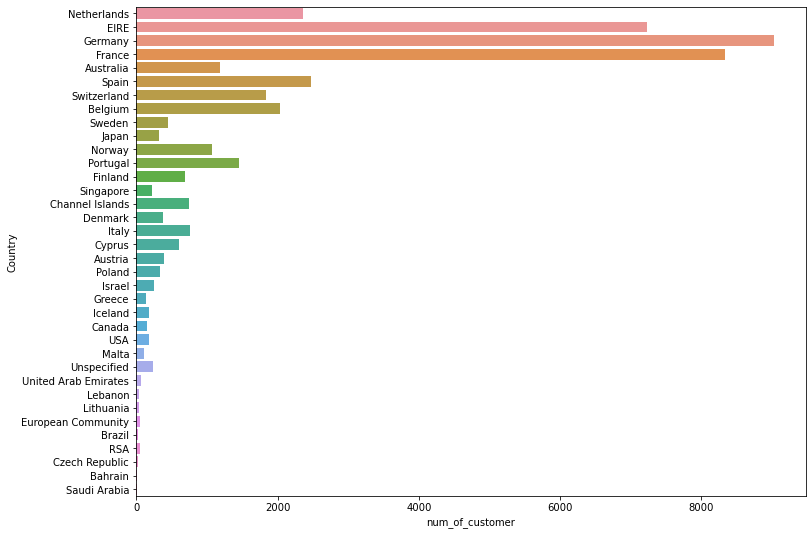

In [50]:
plt.figure(figsize=(12,9))
sns.barplot(df_new.iloc[1:].num_of_customer, df_new.iloc[1:].index)

In [51]:
df_new.iloc[1:].total_price

Country
Netherlands             285446.34
EIRE                    265262.46
Germany                 228678.40
France                  208934.31
Australia               138453.81
Spain                    61558.56
Switzerland              56443.95
Belgium                  41196.34
Sweden                   38367.83
Japan                    37416.37
Norway                   36165.44
Portugal                 33375.84
Finland                  22546.08
Singapore                21279.29
Channel Islands          20440.54
Denmark                  18955.34
Italy                    17483.24
Cyprus                   13502.85
Austria                  10198.68
Poland                    7334.65
Israel                    7215.84
Greece                    4760.52
Iceland                   4310.00
Canada                    3666.38
USA                       3580.39
Malta                     2725.59
Unspecified               2660.77
United Arab Emirates      1902.28
Lebanon                   1693.88
Lithua

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_price', ylabel='Country'>

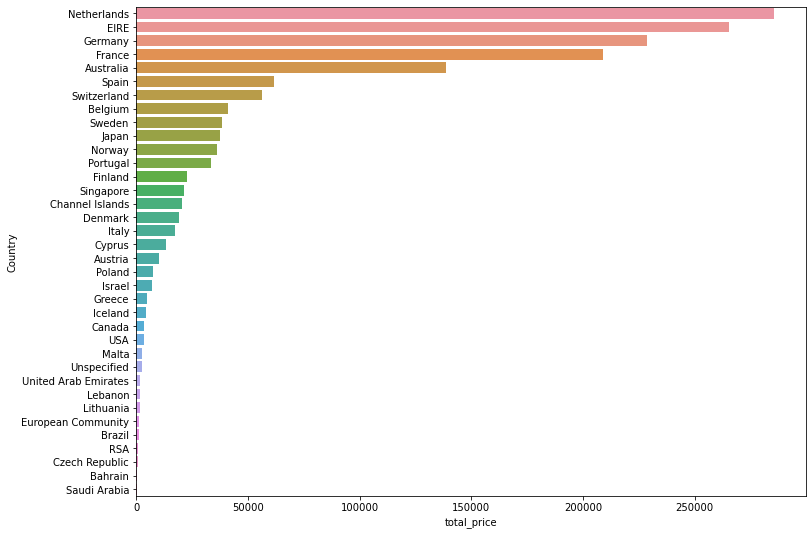

In [52]:
plt.figure(figsize=(12,9))
sns.barplot(df_new.iloc[1:].total_price, df_new.iloc[1:].index)

In [53]:
df_uk = df[df.Country == 'United Kingdom']

In [54]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [55]:
explain('StockCode')

'Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.'

In [56]:
df_uk.StockCode.value_counts()

85123A    1936
85099B    1461
22423     1417
84879     1320
47566     1300
          ... 
79323B       1
44265        1
47503J       1
84854        1
23843        1
Name: StockCode, Length: 3645, dtype: int64

In [57]:
import datetime as dt

In [58]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [59]:
df_uk = df[df.Country == 'United Kingdom']

In [60]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [61]:
min_invoice = min(df['InvoiceDate'])
min_invoice

Timestamp('2010-12-01 08:26:00')

In [62]:
max_invoice = max(df['InvoiceDate'])
max_invoice

Timestamp('2011-12-09 12:50:00')

In [63]:
df_uk['Date'] = df_uk['InvoiceDate'].dt.date
df_uk['Date']

C:\Users\PC\AppData\Local\Temp/ipykernel_10772/1081087628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['Date'] = df_uk['InvoiceDate'].dt.date


0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541889    2011-12-09
541890    2011-12-09
541891    2011-12-09
541892    2011-12-09
541893    2011-12-09
Name: Date, Length: 349203, dtype: object

In [64]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [65]:
df_uk['last_of_purchasedate'] = df_uk.groupby('CustomerID')['Date'].transform(max)

C:\Users\PC\AppData\Local\Temp/ipykernel_10772/1009633233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['last_of_purchasedate'] = df_uk.groupby('CustomerID')['Date'].transform(max)


In [66]:
df_uk.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,Date,last_of_purchasedate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-02
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-02


In [67]:
df_uk['recency'] = df_uk.groupby('CustomerID')['last_of_purchasedate'].apply(lambda x: max_invoice.date() - x)
df_uk['recency'] = df_uk['recency'].astype('timedelta64[D]')
df_uk.head(2)

C:\Users\PC\AppData\Local\Temp/ipykernel_10772/177002818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['recency'] = df_uk.groupby('CustomerID')['last_of_purchasedate'].apply(lambda x: max_invoice.date() - x)
C:\Users\PC\AppData\Local\Temp/ipykernel_10772/177002818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['recency'] = df_uk['recency'].astype('timedelta64[D]')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,Date,last_of_purchasedate,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-02,372.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-02,372.0


In [68]:
df_uk = df_uk.drop('last_of_purchasedate',axis=1)

In [69]:
df_uk.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,Date,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,372.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,372.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='recency'>

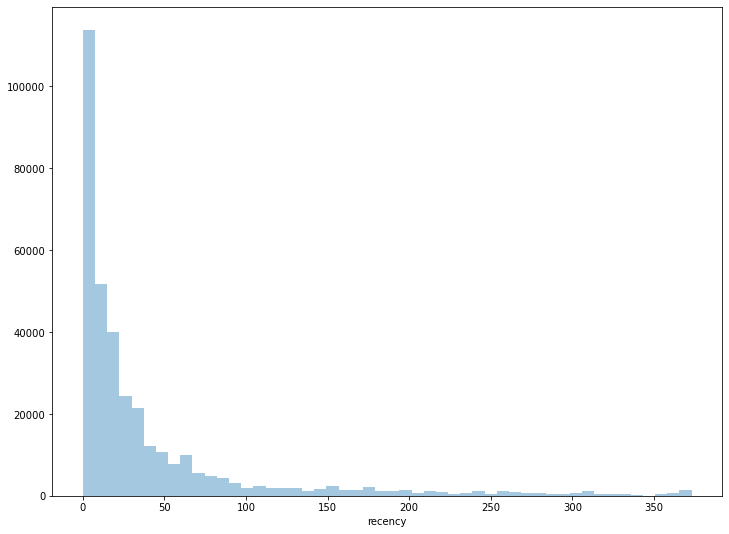

In [70]:
plt.figure(figsize=(12,9))
sns.distplot(df_uk['recency'], kde=False, bins=50)

In [71]:
explain("InvoiceNo")

"Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation."

In [72]:
df_uk = df_uk.drop_duplicates()

In [73]:
df_uk.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,Date,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,372.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372.0


In [74]:
df_uk['frequency'] = df_uk.groupby('CustomerID').InvoiceNo.transform('count')

In [75]:
df_uk.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,Date,recency,frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,372.0,297
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372.0,297


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='frequency'>

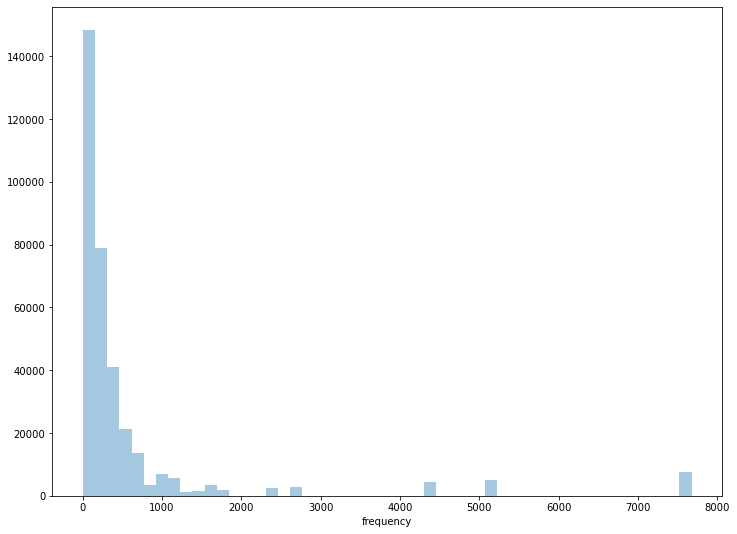

In [76]:
plt.figure(figsize=(12,9))
sns.distplot(df_uk['frequency'], kde=False, bins=50)

In [77]:
df_uk.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,Date,recency,frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,372.0,297
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372.0,297


In [78]:
df_uk['monetary'] = df_uk.groupby('CustomerID').total_price.transform('sum')

In [79]:
df_uk.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,Date,recency,frequency,monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,372.0,297,5391.21
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372.0,297,5391.21


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monetary'>

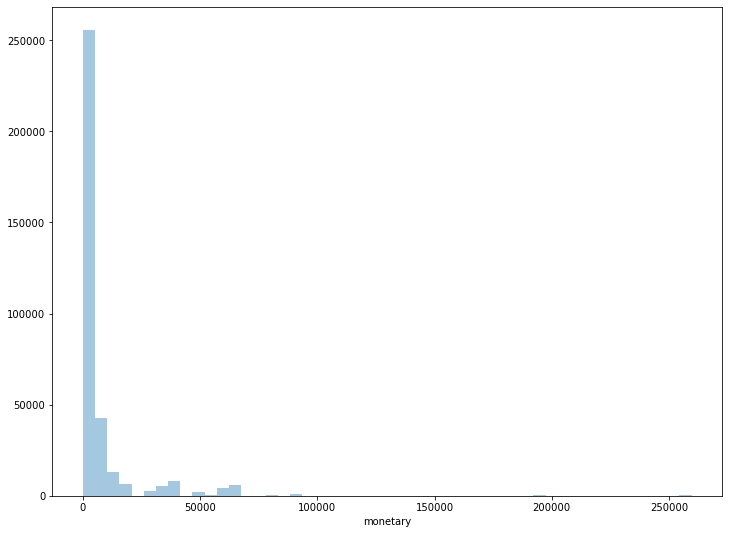

In [80]:
plt.figure(figsize=(12,9))
sns.distplot(df_uk['monetary'], kde=False, bins=50)

In [81]:
df_uk.shape

(349203, 13)

In [82]:
df_rfm = df_uk[['recency','frequency','monetary','CustomerID']]

In [83]:
df_rfm

,recency,frequency,monetary,CustomerID
0,372.0,297,5391.21,17850.0
1,372.0,297,5391.21,17850.0
2,372.0,297,5391.21,17850.0
3,372.0,297,5391.21,17850.0
4,372.0,297,5391.21,17850.0
...,...,...,...,...
541889,0.0,262,4206.39,15804.0
541890,0.0,200,12245.96,13113.0
541891,0.0,200,12245.96,13113.0
541892,0.0,200,12245.96,13113.0


In [84]:
df_rfm = df_rfm.set_index('CustomerID')

In [85]:
df_rfm = df_rfm.drop_duplicates()

In [86]:
df_rfm

,recency,frequency,monetary
CustomerID,,,
17850.0,372.0,297,5391.21
13047.0,31.0,172,3237.54
13748.0,95.0,28,948.25
15100.0,333.0,3,876.00
15291.0,25.0,103,4668.30
...,...,...,...
15471.0,2.0,73,454.48
13436.0,1.0,12,196.89
15520.0,1.0,18,343.50


In [87]:
df_rfm['recency'].dtype

dtype('float64')

In [88]:
quantiles = df_rfm.quantile(q=[0.25,0.50,0.75])
quantiles

,recency,frequency,monetary
0.25,17.0,17.0,298.185
0.50,50.0,40.0,644.975
0.75,142.0,98.0,1571.285


In [89]:
"""Find customers recency score to calculate RFM score
    x: value in the cell of your dateframe
    p: quantile dataframe
    d: column name in the quantile dataframe"""
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [90]:
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [91]:
df_rfm['R_Quartile'] = df_rfm['recency'].apply(RScore, args=('recency',quantiles))
df_rfm['F_Quartile'] = df_rfm['frequency'].apply(FMScore, args=('frequency',quantiles))
df_rfm['M_Quartile'] = df_rfm['monetary'].apply(FMScore, args=('monetary',quantiles))

In [92]:
df_rfm

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
17850.0,372.0,297,5391.21,1,4,4
13047.0,31.0,172,3237.54,3,4,4
13748.0,95.0,28,948.25,2,2,3
15100.0,333.0,3,876.00,1,1,3
15291.0,25.0,103,4668.30,3,4,4
...,...,...,...,...,...,...
15471.0,2.0,73,454.48,4,3,2
13436.0,1.0,12,196.89,4,1,1
15520.0,1.0,18,343.50,4,2,2


In [93]:
df_rfm['RFM Score'] = df_rfm['R_Quartile'].map(str) + df_rfm['F_Quartile'].map(str) + df_rfm['M_Quartile'].map(str)
df_rfm.head()

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFM Score
CustomerID,,,,,,,
17850.0,372.0,297,5391.21,1,4,4,144
13047.0,31.0,172,3237.54,3,4,4,344
13748.0,95.0,28,948.25,2,2,3,223
15100.0,333.0,3,876.00,1,1,3,113
15291.0,25.0,103,4668.30,3,4,4,344


In [94]:
df_rfm['rfm_level'] = df_rfm['R_Quartile'] + df_rfm['F_Quartile'] + df_rfm['M_Quartile']
df_rfm.head(3)


,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFM Score,rfm_level
CustomerID,,,,,,,,
17850.0,372.0,297,5391.21,1,4,4,144,9
13047.0,31.0,172,3237.54,3,4,4,344,11
13748.0,95.0,28,948.25,2,2,3,223,7


In [95]:
df[df['total_price']==0].shape

(0, 9)

In [96]:
df_rfm.groupby(['RFM Score']).size().sort_values(ascending=False)[:5]

RFM Score
444    407
111    343
344    184
122    178
211    166
dtype: int64

In [97]:
df_rfm[df_rfm['RFM Score']=='111'].head()

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFM Score,rfm_level
CustomerID,,,,,,,,
13747.0,373.0,1,79.60,1,1,1,111,3
16583.0,373.0,14,233.45,1,1,1,111,3
14237.0,373.0,9,161.00,1,1,1,111,3
15350.0,373.0,5,115.65,1,1,1,111,3
17643.0,373.0,8,101.55,1,1,1,111,3


In [98]:
df_rfm['rfm_level'].max()

12

In [99]:
df_rfm['rfm_level'].min()

3

If RFM_Level >= 10, then "Gold"
If 6 <= RFM_Level < 10, then "Silver"
If 3 <= RFM_Level < 6, then "Bronze"

In [100]:
def segments(df_rfm):
    if df_rfm['rfm_level'] >= 10 :
        return 'Gold'
    elif (df_rfm['rfm_level'] >= 6) and (df_rfm['rfm_level'] < 10 ):
        return 'Sliver'
    else:  
        return 'Bronze'
    
df_rfm['General_Segment'] = df_rfm.apply(segments,axis=1)

In [101]:
df_rfm.head()

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFM Score,rfm_level,General_Segment
CustomerID,,,,,,,,,
17850.0,372.0,297,5391.21,1,4,4,144,9,Sliver
13047.0,31.0,172,3237.54,3,4,4,344,11,Gold
13748.0,95.0,28,948.25,2,2,3,223,7,Sliver
15100.0,333.0,3,876.00,1,1,3,113,5,Bronze
15291.0,25.0,103,4668.30,3,4,4,344,11,Gold


In [102]:
avg_rfm_level = df_rfm.groupby('General_Segment').rfm_level.mean()
size_rfm_level = df_rfm['General_Segment'].value_counts()
df_new = pd.concat([avg_rfm_level, size_rfm_level], axis=1).rename(columns={'rfm_level':'avg_rfm_level',
                                                                           'General_Segment':'size_rfm_level'})

In [103]:
df_new

,avg_rfm_level,size_rfm_level
Bronze,4.108936,1175
Gold,11.017513,1142
Sliver,7.462258,1603


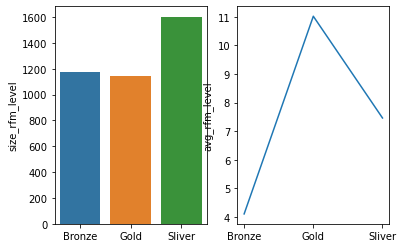

In [104]:
plt.subplot(1, 2, 1)
ax1=sns.barplot(x=df_new.index, y=df_new.size_rfm_level)
plt.subplot(1, 2, 2)
ax2=sns.lineplot(x=df_new.index, y=df_new.avg_rfm_level)

In [105]:
df_rfm.General_Segment.value_counts()

Sliver    1603
Bronze    1175
Gold      1142
Name: General_Segment, dtype: int64

In [106]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [107]:
df_rfm.head()

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFM Score,rfm_level,General_Segment
CustomerID,,,,,,,,,
17850.0,372.0,297,5391.21,1,4,4,144,9,Sliver
13047.0,31.0,172,3237.54,3,4,4,344,11,Gold
13748.0,95.0,28,948.25,2,2,3,223,7,Sliver
15100.0,333.0,3,876.00,1,1,3,113,5,Bronze
15291.0,25.0,103,4668.30,3,4,4,344,11,Gold


In [108]:
df_rfm.groupby('rfm_level').agg({
'recency': ['mean','min','max','count'],
'frequency': ['mean','min','max','count'],
'monetary': ['mean','min','max','count'] }).round(1)

recency                     frequency                 monetary  \
             mean    min    max count      mean min   max count     mean   
rfm_level                                                                  
3           258.1  143.0  373.0   343       8.1   1    17   343    151.9   
4           175.4   51.0  373.0   361      13.6   1    39   361    233.5   
5           151.4   18.0  373.0   471      20.5   1    84   471    354.7   
6            97.2    1.0  373.0   426      28.2   1    98   426    825.2   
7            78.6    1.0  358.0   387      38.4   1   123   387    734.1   
8            60.1    0.0  338.0   413      54.5   3   248   413    906.4   
9            46.9    0.0  372.0   377      77.7   1   521   377   1792.5   
10           32.3    0.0  140.0   387     111.1  20   400   387   1914.7   
11           20.1    0.0   50.0   348     182.3  41  1175   348   3434.5   
12            6.6    0.0   17.0   407     360.5  99  7676   407   8254.6   

                                   
              min       max count  
rfm_level                          
3             3.8     298.1   343  
4             6.2     635.7   361  
5             6.9    1308.5   471  
6            35.4   77183.6   426  
7           114.3    7374.9   387  
8           120.0    6912.0   413  
9           271.2  168472.5   377  
10          302.1   42056.0   387  
11          653.2   80850.8   348  
12         1581.8  259657.3   407

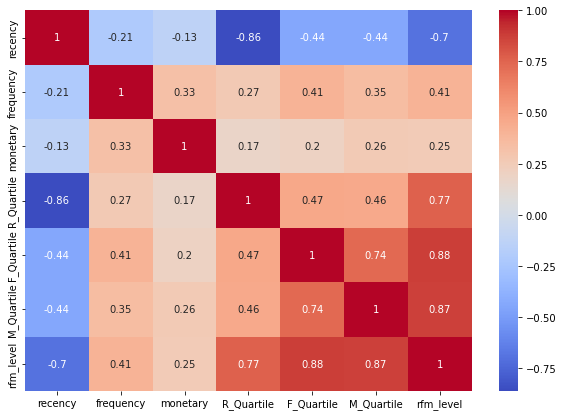

In [109]:
plt.figure(figsize=(10,7))
sns.heatmap(df_rfm.corr(),annot=True, cmap="coolwarm");

<Figure size 1440x1440 with 0 Axes>

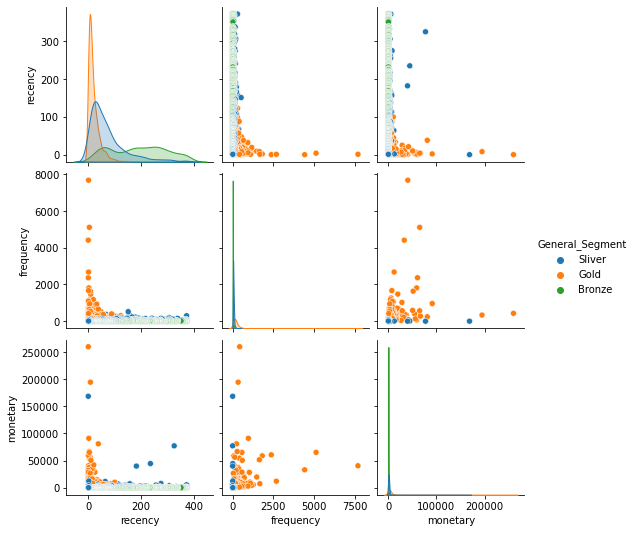

In [110]:
plt.figure(figsize=(20,20))
sns.pairplot(df_rfm[['recency', 'frequency', 'monetary','General_Segment']],hue='General_Segment');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

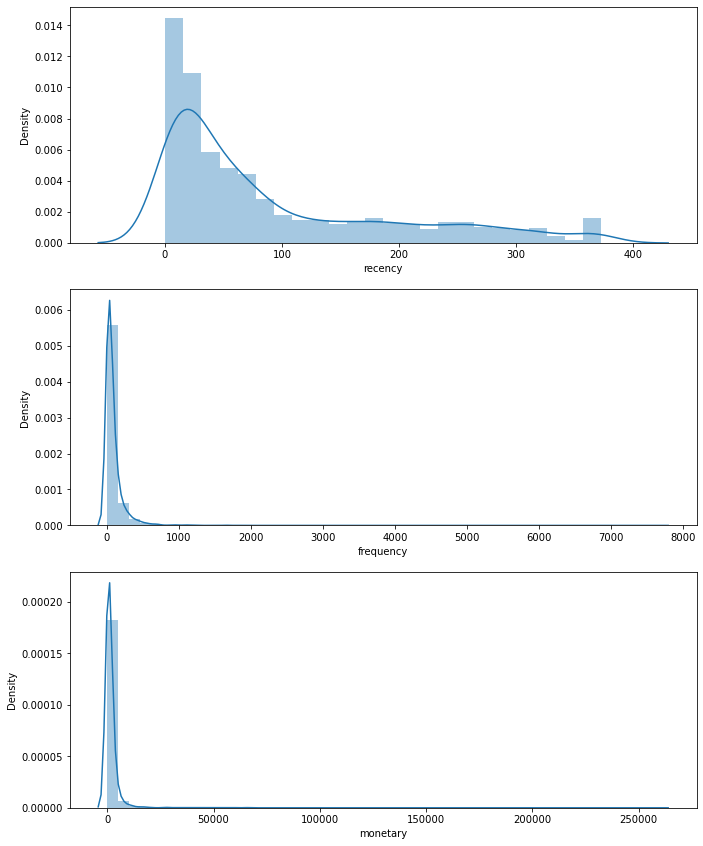

In [111]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(df_rfm.recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(df_rfm.frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(df_rfm.monetary, label = 'Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [112]:
rfm_log = df_rfm[['recency', 'frequency', 'monetary']].apply(np.log1p, axis = 1).round(3)

In [113]:
rfm_log

,recency,frequency,monetary
CustomerID,,,
17850.0,5.922,5.697,8.593
13047.0,3.466,5.153,8.083
13748.0,4.564,3.367,6.856
15100.0,5.811,1.386,6.777
15291.0,3.258,4.644,8.449
...,...,...,...
15471.0,1.099,4.304,6.121
13436.0,0.693,2.565,5.288
15520.0,0.693,2.944,5.842


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

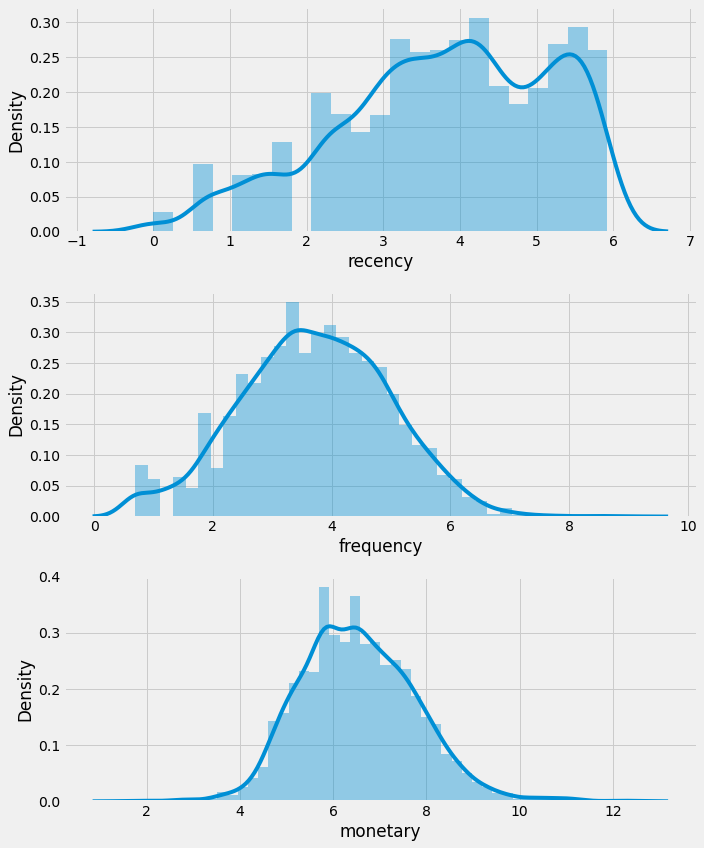

In [114]:
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm_log.recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_log.frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_log.monetary, label = 'Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [115]:
#Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
#Store it separately for clustering
rfm_normalized= scaler.transform(rfm_log)

In [116]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

In [117]:
hopkins(rfm_log,rfm_log.shape[0])

0.09915667785130879

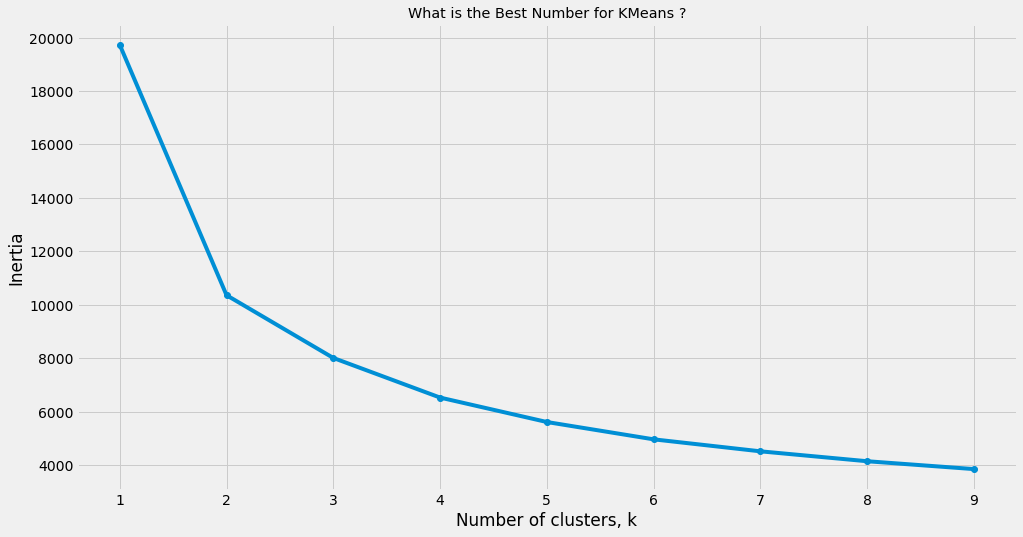

In [118]:
#First : Get the Best KMeans 
ks = range(1,10)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_log)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

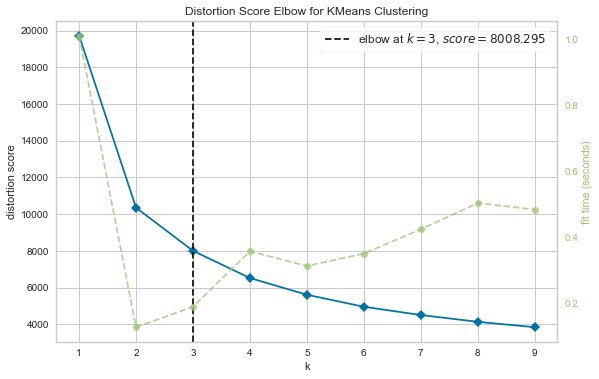

In [119]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(rfm_log)
visu.show();

In [120]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(rfm_log)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(rfm_log, model.labels_)}')

Silhouette Score for 2 clusters: 0.39867976594910454
Silhouette Score for 3 clusters: 0.30495090217439424
Silhouette Score for 4 clusters: 0.3120766570877241
Silhouette Score for 5 clusters: 0.2765727269245742
Silhouette Score for 6 clusters: 0.27791409571484826
Silhouette Score for 7 clusters: 0.2620858422124388
Silhouette Score for 8 clusters: 0.26015543810546504
Silhouette Score for 9 clusters: 0.2610635248493194


In [121]:
kmeans = KMeans(n_clusters = 3).fit(rfm_log)
labels = kmeans.labels_
rfm_log['ClusterID']=labels

In [122]:
rfm_log

,recency,frequency,monetary,ClusterID
CustomerID,,,,
17850.0,5.922,5.697,8.593,1
13047.0,3.466,5.153,8.083,2
13748.0,4.564,3.367,6.856,1
15100.0,5.811,1.386,6.777,0
15291.0,3.258,4.644,8.449,2
...,...,...,...,...
15471.0,1.099,4.304,6.121,2
13436.0,0.693,2.565,5.288,1
15520.0,0.693,2.944,5.842,2


In [123]:
rfm_log.iloc[:,0]

CustomerID
17850.0    5.922
13047.0    3.466
13748.0    4.564
15100.0    5.811
15291.0    3.258
           ...  
15471.0    1.099
13436.0    0.693
15520.0    0.693
13298.0    0.693
14569.0    0.693
Name: recency, Length: 3920, dtype: float64

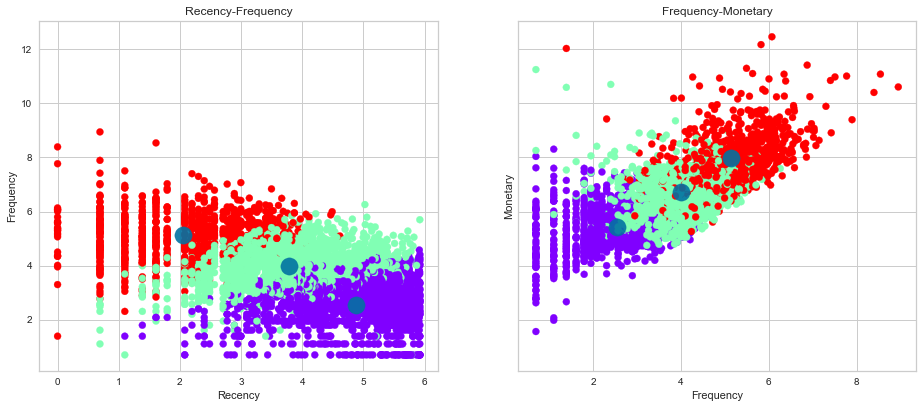

In [124]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,6)) # sharey=True ile y eksen labels lari ortak kullanirlar.
ax1.set_title('Recency-Frequency')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')
ax1.scatter(rfm_log.iloc[:,0],rfm_log.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300,alpha=0.9, label = 'Centroids')

ax2.set_title("Frequency-Monetary")
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Monetary')
ax2.scatter(rfm_log.iloc[:,1],rfm_log.iloc[:,2],c=kmeans.labels_,cmap="rainbow")
ax2.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300,alpha=0.9, label = 'Centroids');


In [125]:
rfm_log.ClusterID.value_counts()

1    1637
0    1420
2     863
Name: ClusterID, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


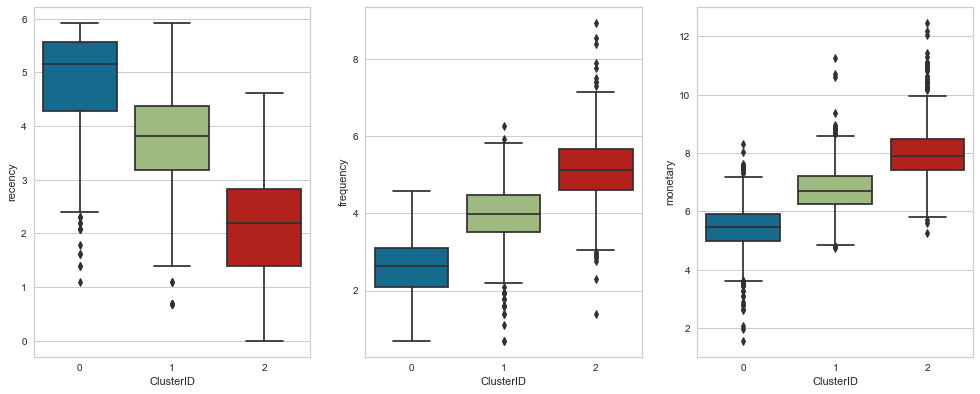

In [126]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(rfm_log['ClusterID'], rfm_log['recency'])

plt.subplot(1,3,2)
sns.boxplot(rfm_log['ClusterID'], rfm_log['frequency'])

plt.subplot(1,3,3)
sns.boxplot(rfm_log['ClusterID'], rfm_log['monetary'])
plt.show()

In [127]:
rfm_log['Labels'] = rfm_log['ClusterID'].map({0:'Best_Customers',1:'Almost_Lost',2:'Lost_Customers'})
rfm_log.head() 

,recency,frequency,monetary,ClusterID,Labels
CustomerID,,,,,
17850.0,5.922,5.697,8.593,1,Almost_Lost
13047.0,3.466,5.153,8.083,2,Lost_Customers
13748.0,4.564,3.367,6.856,1,Almost_Lost
15100.0,5.811,1.386,6.777,0,Best_Customers
15291.0,3.258,4.644,8.449,2,Lost_Customers


In [138]:
grouping

In [128]:
def get_month(x) : return dt.datetime(x.year,x.month,1)
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
grouping = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,InvoiceMonth,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-01,2011-08-01


In [129]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(df,'InvoiceMonth')
cohort_year,cohort_month,_ = get_month_int(df,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df['CohortIndex'] = year_diff * 12 + month_diff + 1 

In [130]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1


In [131]:
#Count monthly active customers from each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage 

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


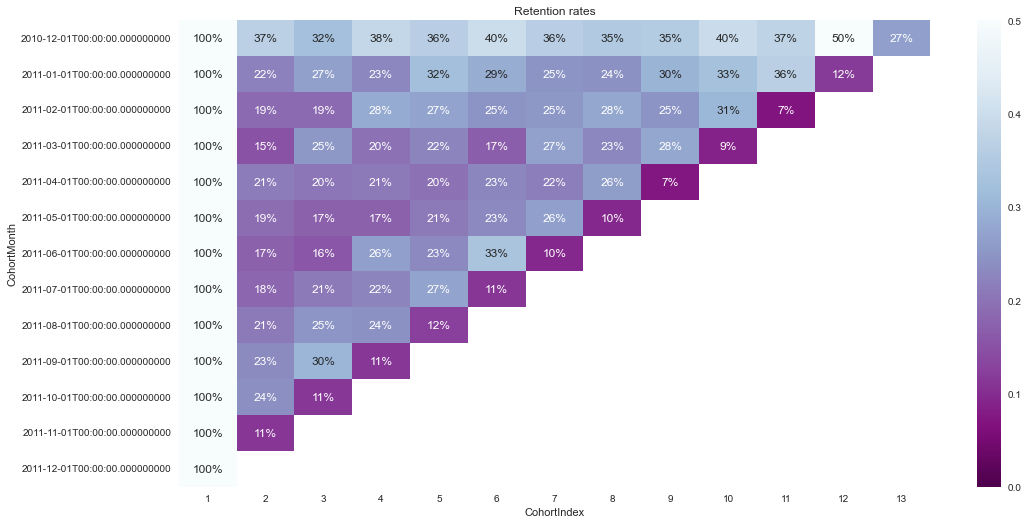

In [133]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

In [134]:
#Average quantity for each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

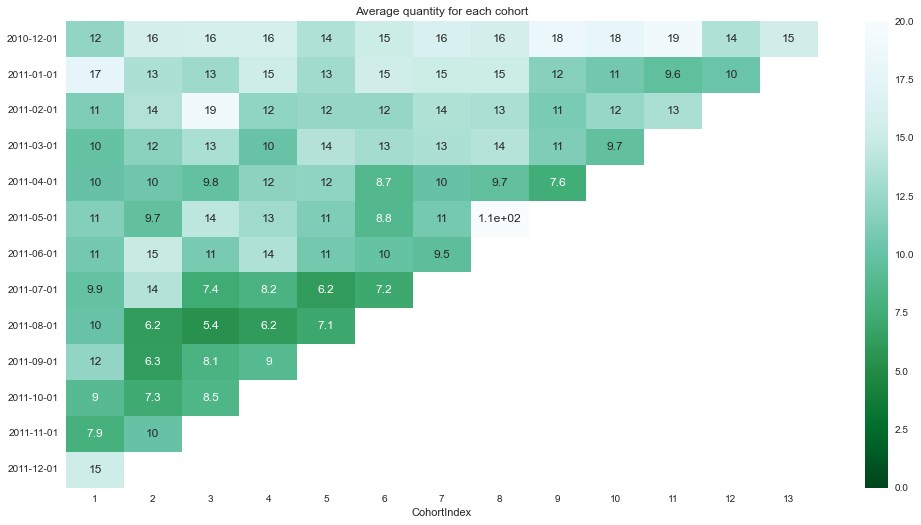

In [135]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20,cmap="BuGn_r")
plt.show()

In [136]:
#Average unitprice for each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['UnitPrice'].mean()
cohort_data = cohort_data.reset_index()
average_price = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='UnitPrice')
average_price.round(1)
average_price.index = average_price.index.date

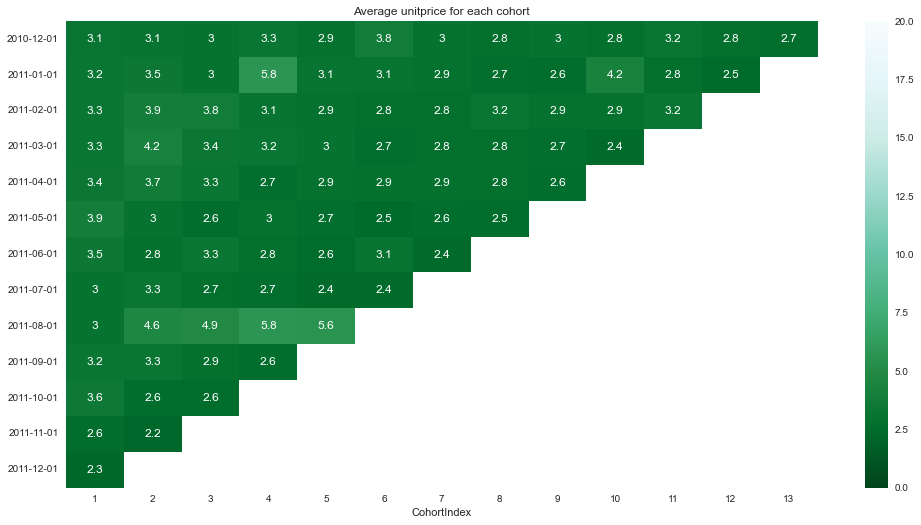

In [137]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Average unitprice for each cohort')
sns.heatmap(data=average_price,annot = True,vmin = 0.0,vmax =20,cmap="BuGn_r")
plt.show()